# **Problem 2: Part c**

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

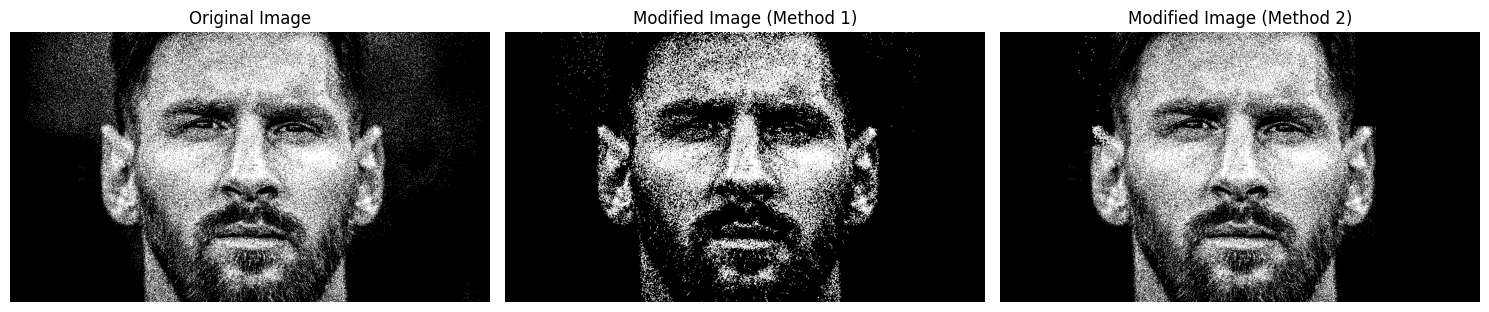

In [11]:
image = cv2.imread('leo.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, int(0.02 * 255), 255, cv2.THRESH_BINARY)

## Method 1
# Horizontal structuring element
se1 = np.array([[1, 1]], dtype=np.uint8)
image_opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, se1, iterations=1)

# Vertical structuring element
se2 = np.array([[1], [1]], dtype=np.uint8)
image_opening = cv2.morphologyEx(image_opening, cv2.MORPH_OPEN, se2, iterations=1)


## Method 2
# Define target regions
regions = np.array([
    [1, 1],
    [305, 292],
    [521, 271],
    [652, 351],
    [1, 947],
    [251, 1280],
    [251, 1003],
    [716, 1280]
])

image = binary_image.copy()

# Structural element for method 2
se = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)

for i in range(0, 8, 2):
    x1, y1 = regions[i]
    x2, y2 = regions[i+1]
    image[x1-1:x2, y1-1:y2] = cv2.morphologyEx(image[x1-1:x2, y1-1:y2], cv2.MORPH_OPEN, se, iterations=1)

# Display original image with results from Method 1 and Method 2
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_opening, cmap='gray')
plt.title('Modified Image (Method 1)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image, cmap='gray')
plt.title('Modified Image (Method 2)')
plt.axis('off')

plt.tight_layout()
plt.show()